In [34]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the LTE KPI dataset
df = pd.read_excel(r'C:\Users\ezagrri\LearnBay\datasets\LTE_KPI_DATA.xlsx')
df.head(10)

,Sector,Site ID,Index,Start Time,End Time,Query Granularity,Subnetwork,Subnetwork Name,ManagedElement,ManagedElement Name,...,[LTE]Average PHY DL Throughput(Mbps),[LTE]Maximum PHY UL Throughput(Mbps),[LTE]Minimum PHY UL Throughput(Mbps),[LTE]Average PHY UL Throughput(Mbps),E_4G_RRC Drop Rate,E_4G_E-RAB Drop Rate,E_4G_Downlink IP Throughput(Mbps),E_4G_DL PRB Utilization Rate,Cell DL Traffic(MByte),Data Integrity
0,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,5.1070,4.7671,0.0488,0.8055,0.0008,0.0000,3.3748,0.6028,1889.9612,1.0
1,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.0066,4.7030,0.0003,0.3598,0.0014,0.0000,3.2924,0.4199,732.5299,1.0
2,1432A SEC 3,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.5850,2.2280,0.0000,0.4007,0.0000,0.0000,7.7894,0.1003,202.0574,1.0
3,1432A SEC 4,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.8774,1.2475,0.0000,0.0675,0.0000,0.0000,21.2716,0.0931,345.3261,1.0
4,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,22.0502,21.8013,2.5141,5.3262,0.0009,0.0001,0.7956,0.9818,8253.9837,1.0
5,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.5804,9.2878,0.0030,0.5908,0.0004,0.0006,9.0803,0.2040,949.5160,1.0
6,1432A SEC 3,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,4.3238,3.7616,0.0036,0.6286,0.0016,0.0017,9.1184,0.2788,1661.2424,1.0
7,1432A SEC 4,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,9.3113,40.4924,0.1192,1.7502,0.0003,0.0004,7.4910,0.4840,3491.2886,1.0
8,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,14.3584,23.6669,0.4421,2.8189,0.0005,0.0000,2.7324,0.7485,5155.8077,1.0
9,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.5649,1.8412,0.0000,0.2643,0.0072,0.0009,9.2469,0.2164,926.4011,1.0


In [36]:
# Step 1: Convert 'Start Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df

C:\Users\ezagrri\AppData\Local\Temp\ipykernel_13460\2339190748.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')


,Sector,Site ID,Index,Start Time,End Time,Query Granularity,Subnetwork,Subnetwork Name,ManagedElement,ManagedElement Name,...,[LTE]Average PHY DL Throughput(Mbps),[LTE]Maximum PHY UL Throughput(Mbps),[LTE]Minimum PHY UL Throughput(Mbps),[LTE]Average PHY UL Throughput(Mbps),E_4G_RRC Drop Rate,E_4G_E-RAB Drop Rate,E_4G_Downlink IP Throughput(Mbps),E_4G_DL PRB Utilization Rate,Cell DL Traffic(MByte),Data Integrity
0,1432A SEC 1,1432A,NaN,2021-02-18 00:00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,5.1070,4.7671,0.0488,0.8055,0.0008,0.0000,3.3748,0.6028,1889.9612,1.0
1,1432A SEC 2,1432A,NaN,2021-02-18 00:00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.0066,4.7030,0.0003,0.3598,0.0014,0.0000,3.2924,0.4199,732.5299,1.0
2,1432A SEC 3,1432A,NaN,2021-02-18 00:00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.5850,2.2280,0.0000,0.4007,0.0000,0.0000,7.7894,0.1003,202.0574,1.0
3,1432A SEC 4,1432A,NaN,2021-02-18 00:00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.8774,1.2475,0.0000,0.0675,0.0000,0.0000,21.2716,0.0931,345.3261,1.0
4,1432A SEC 1,1432A,NaN,2021-02-18 00:00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,22.0502,21.8013,2.5141,5.3262,0.0009,0.0001,0.7956,0.9818,8253.9837,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,1432A SEC 2,1432A,NaN,2021-04-03 17:00:00,03/04/21 18:00,1 hour,2002,2002(2002),23401,1432A-SDR-009_E_PROJECT_RRU SWAP 4T4R(23401),...,1.3059,9.0409,0.0000,0.2055,0.0019,0.0000,9.2642,0.1021,465.7811,NaN
4220,1432A SEC 3,1432A,NaN,2021-04-03 17:00:00,03/04/21 18:00,1 hour,2002,2002(2002),23401,1432A-SDR-009_E_PROJECT_RRU SWAP 4T4R(23401),...,4.0412,18.2362,0.0346,1.1908,0.0056,0.0012,4.6292,0.3970,1433.4213,NaN
4221,1432A SEC 4,1432A,NaN,2021-04-03 17:00:00,03/04/21 18:00,1 hour,2002,2002(2002),23401,1432A-SDR-009_E_PROJECT_RRU SWAP 4T4R(23401),...,13.2258,36.1972,0.1835,2.2506,0.0020,0.0004,14.6745,0.4120,5070.7354,NaN
4222,1432A SEC 3,1432A,NaN,2021-04-03 17:00:00,03/04/21 18:00,1 hour,2002,2002(2002),23401,1432A-SDR-009_E_PROJECT_RRU SWAP 4T4R(23401),...,1.0574,4.2979,0.0003,0.4463,0.0027,0.0000,3.3481,0.2553,393.9820,NaN


In [37]:
# Step 2: Take cutoff date as input and create 'Period' column
user_input = input("Enter RRU swap cutoff date (YYYY-MM-DD): ")
cutoff_date = pd.to_datetime(user_input, errors='coerce')

if pd.isnull(cutoff_date):
    raise ValueError("Invalid date format. Please enter in YYYY-MM-DD format.")

df['Period'] = df['Start Time'].apply(lambda x: 'Before' if x < cutoff_date else 'After')

Enter RRU swap cutoff date (YYYY-MM-DD):  2021-02-24


In [38]:
df.head(10)

,Sector,Site ID,Index,Start Time,End Time,Query Granularity,Subnetwork,Subnetwork Name,ManagedElement,ManagedElement Name,...,[LTE]Maximum PHY UL Throughput(Mbps),[LTE]Minimum PHY UL Throughput(Mbps),[LTE]Average PHY UL Throughput(Mbps),E_4G_RRC Drop Rate,E_4G_E-RAB Drop Rate,E_4G_Downlink IP Throughput(Mbps),E_4G_DL PRB Utilization Rate,Cell DL Traffic(MByte),Data Integrity,Period
0,1432A SEC 1,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,4.7671,0.0488,0.8055,0.0008,0.0000,3.3748,0.6028,1889.9612,1.0,Before
1,1432A SEC 2,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,4.7030,0.0003,0.3598,0.0014,0.0000,3.2924,0.4199,732.5299,1.0,Before
2,1432A SEC 3,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.2280,0.0000,0.4007,0.0000,0.0000,7.7894,0.1003,202.0574,1.0,Before
3,1432A SEC 4,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,1.2475,0.0000,0.0675,0.0000,0.0000,21.2716,0.0931,345.3261,1.0,Before
4,1432A SEC 1,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,21.8013,2.5141,5.3262,0.0009,0.0001,0.7956,0.9818,8253.9837,1.0,Before
5,1432A SEC 2,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,9.2878,0.0030,0.5908,0.0004,0.0006,9.0803,0.2040,949.5160,1.0,Before
6,1432A SEC 3,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,3.7616,0.0036,0.6286,0.0016,0.0017,9.1184,0.2788,1661.2424,1.0,Before
7,1432A SEC 4,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,40.4924,0.1192,1.7502,0.0003,0.0004,7.4910,0.4840,3491.2886,1.0,Before
8,1432A SEC 1,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,23.6669,0.4421,2.8189,0.0005,0.0000,2.7324,0.7485,5155.8077,1.0,Before
9,1432A SEC 2,1432A,NaN,2021-02-18,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,1.8412,0.0000,0.2643,0.0072,0.0009,9.2469,0.2164,926.4011,1.0,Before


In [39]:
# Step 3: Filter numeric KPI columns (ignore identifiers like 'Cell Name' etc.)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
identifier_cols = ['Cell Name', 'Site ID', 'eNodeB','Subnetwork','ManagedElement','Cell','Index']  # update as needed
kpi_columns = [col for col in numeric_cols if col not in identifier_cols]

In [40]:
for i in kpi_columns:
    print(i)

[FDD]Cell Availability
E_4G_PSSR
LO_03 eUTRAN PS Drop Rate (%)_1575534874525-0-6
Intra LTE Outgoing Handover Success Rate (Inter-Freq+IntraFreq)_1575534874525-0-7
[FDD]LTE-to-UMTS Ho Success Rate(Cell)
DL E-UTRAN IP Throughput(Mbps(0901))_1575534874525-0-10
[FDD]DL PRB Utilization Rate
[FDD]Maximum RRC-Connected User Number
E_4G_VOLTE_Traffic(Erlang)
[LTE]Maximum PHY DL Throughput(Mbps)
[LTE]Minimum PHY DL Throughput(Mbps)
[LTE]Average PHY DL Throughput(Mbps)
[LTE]Maximum PHY UL Throughput(Mbps)
[LTE]Minimum PHY UL Throughput(Mbps)
[LTE]Average PHY UL Throughput(Mbps)
E_4G_RRC Drop Rate
E_4G_E-RAB Drop Rate
E_4G_Downlink IP Throughput(Mbps)
E_4G_DL PRB Utilization Rate
Cell DL Traffic(MByte)
Data Integrity


In [41]:
# Step 4: Perform T-test on each KPI
results = []

for kpi in kpi_columns:
    df[kpi] = pd.to_numeric(df[kpi], errors='coerce')
    before = df[df['Period'] == 'Before'][kpi].dropna()
    after = df[df['Period'] == 'After'][kpi].dropna()
    
    if len(before) > 1 and len(after) > 1:
        t_stat, p_val = ttest_ind(before, after, equal_var=False)
        
        # Add significance labels
        if p_val < 0.001:
            sig = "Highly significant"
        elif p_val < 0.05:
            sig = "Significant"
        elif p_val < 0.1:
            sig = "Marginally significant"
        else:
            sig = "Not significant"

        results.append({
            'KPI': kpi,
            'Before_Mean': round(before.mean(), 4),
            'After_Mean': round(after.mean(), 4),
            'T-statistic': round(t_stat, 4),
            'P-value': round(p_val, 6),
            'Significance': sig
        })


C:\PythonEnv\PythonSoftware\3.11.6\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [43]:
# Step 5: Save results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='P-value')  # optional: sort by significance
results_df.to_excel(r'C:\Users\ezagrri\LearnBay\datasets\TTest_KPI_Comparison_Before_After.xlsx', index=False)

print("✅ T-test completed and results saved to 'TTest_KPI_Comparison_Before_After.xlsx'")

✅ T-test completed and results saved to 'TTest_KPI_Comparison_Before_After.xlsx'


In [44]:
# Filter only significant KPIs
significant_kpis = results_df[results_df['P-value'] < 0.05]['KPI'].tolist()

In [45]:
# Convert Start Time to just Date for grouping
df['Date'] = df['Start Time'].dt.date

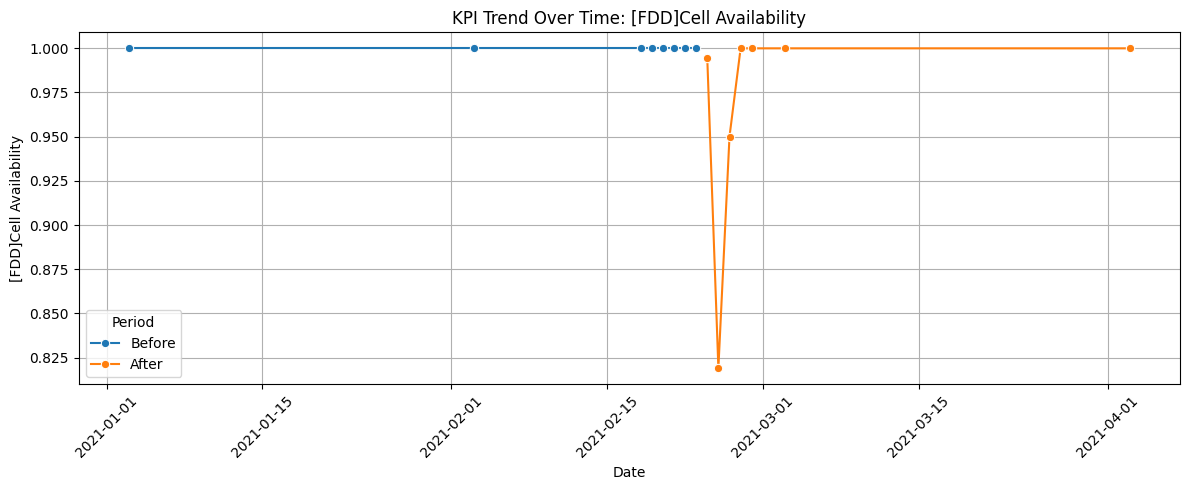

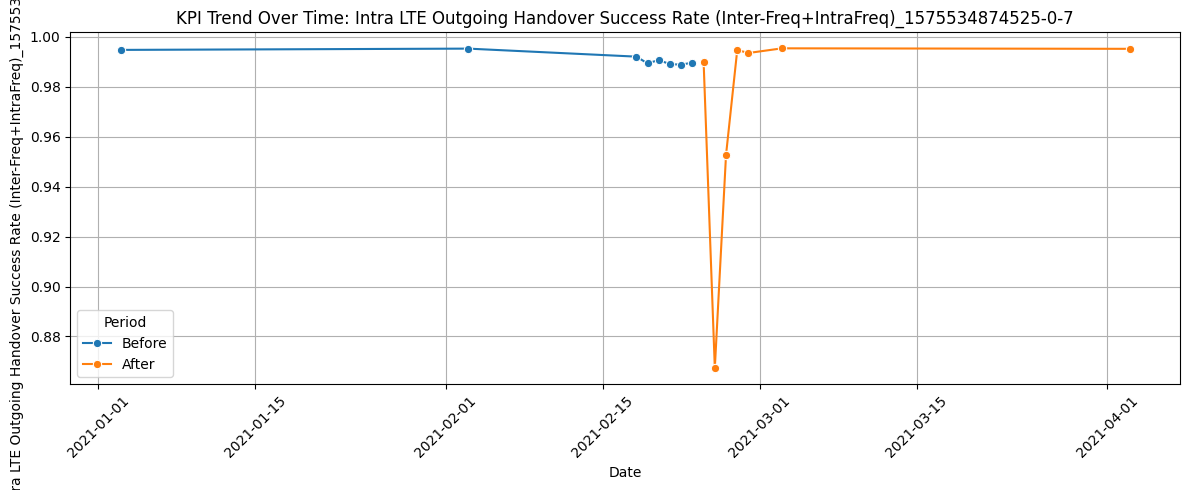

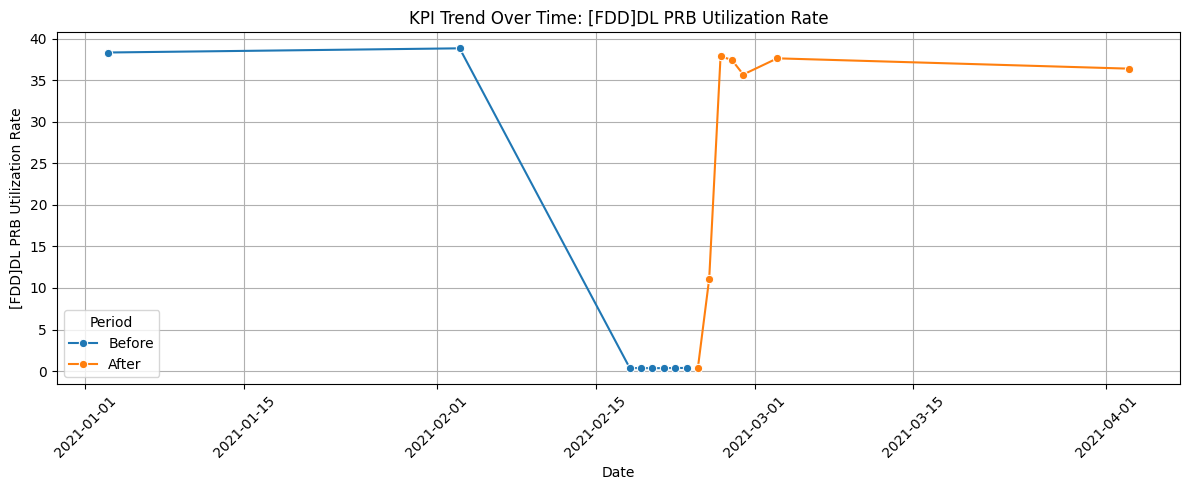

In [46]:
# Plot each significant KPI over time
for kpi in significant_kpis:
    plt.figure(figsize=(12, 5))
    
    # Group by Date and Period and calculate mean
    plot_df = df.groupby(['Date', 'Period'])[kpi].mean().reset_index()

    sns.lineplot(data=plot_df, x='Date', y=kpi, hue='Period', marker='o')

    plt.title(f"KPI Trend Over Time: {kpi}")
    plt.xlabel("Date")
    plt.ylabel(kpi)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Period')
    plt.show()